In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def draw(x_axis,y_axis,label,color,x_label,y_label,title,lw):
    plt.figure(figsize = (15,5))
    plt.grid(alpha = 0.3)
    plt.style.use('dark_background')
    plt.plot(x_axis, y_axis, label=label, color=color,linewidth=lw)
    plt.xlabel(x_label, fontsize = 20)
    plt.ylabel(y_label, fontsize= 20)
    plt.title(title,fontsize = 30)
    plt.legend(loc='upper right')
    plt.show()
    return

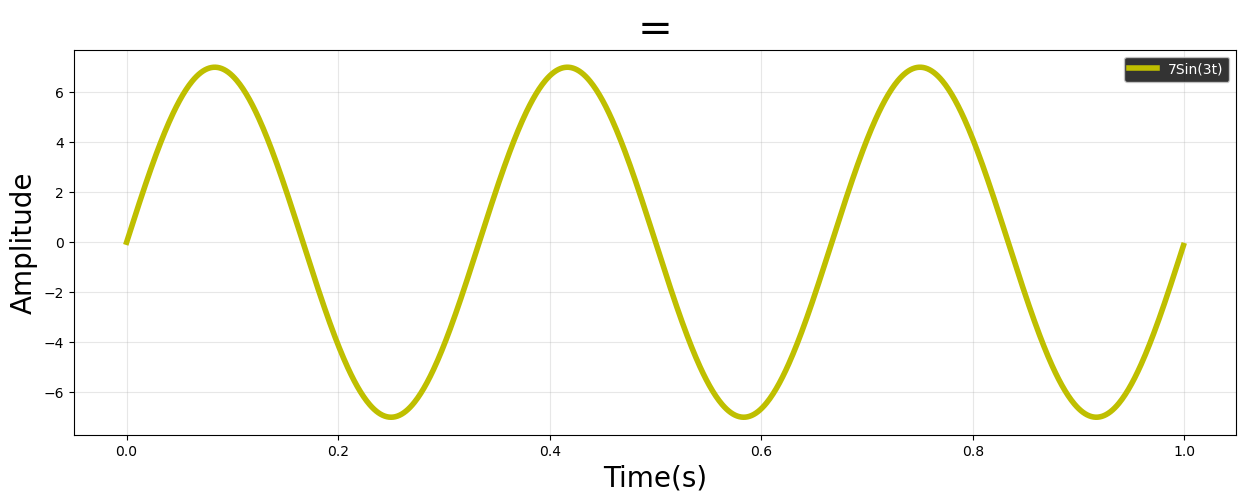

In [2]:
dt  =0.001                                                          
t = np.arange(0,1,dt)                                               

sin_3t = 7*np.sin(2 *  np.pi * 3 * t)# 7Sin(3t) sin signal with frequency of 3 hertz

draw(x_axis = t,y_axis = sin_3t ,label="7Sin(3t)",color="y", x_label = "Time(s)",title="=",
     y_label = "Amplitude", lw=4)


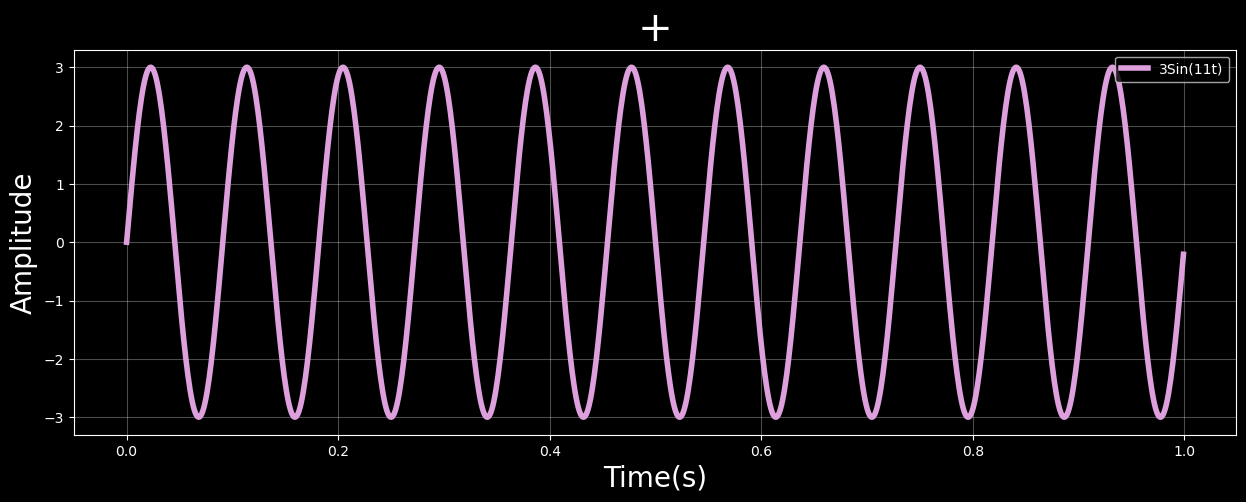

In [4]:
sin_11t = 3*np.sin(2 *  np.pi * 11 * t)# 3Sin11t sin signal with frequency of 11 hertz

draw(x_axis = t,y_axis = sin_11t ,label="3Sin(11t)",color="plum", x_label = "Time(s)",title="+",
     y_label = "Amplitude", lw=4)

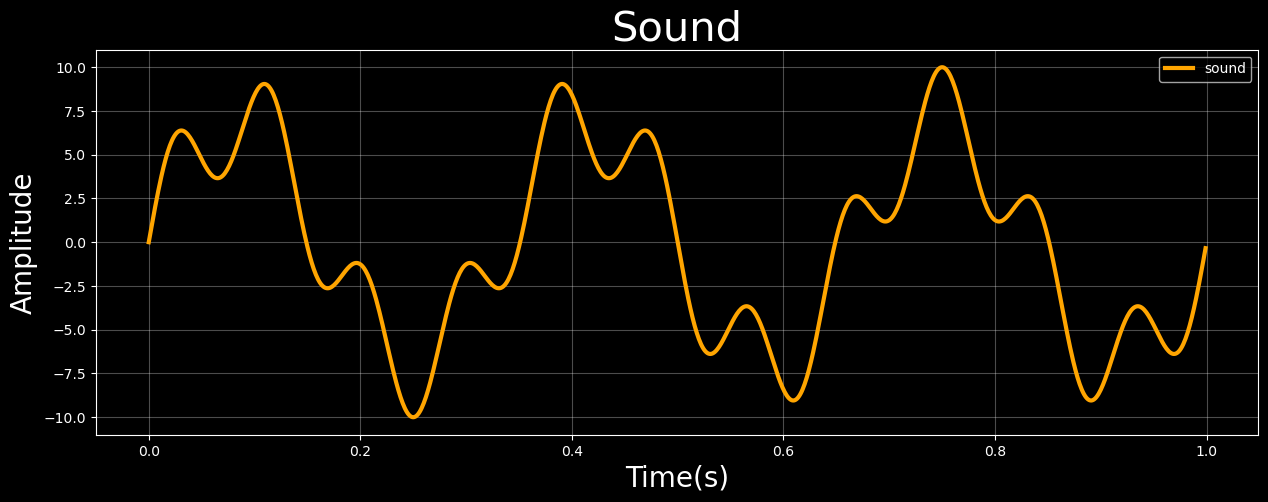

In [5]:
Sum=sin_3t+sin_11t
draw(x_axis = t,y_axis =Sum ,label="sound",color="orange", x_label = "Time(s)",y_label = "Amplitude",
     title="Sound",  lw=3)


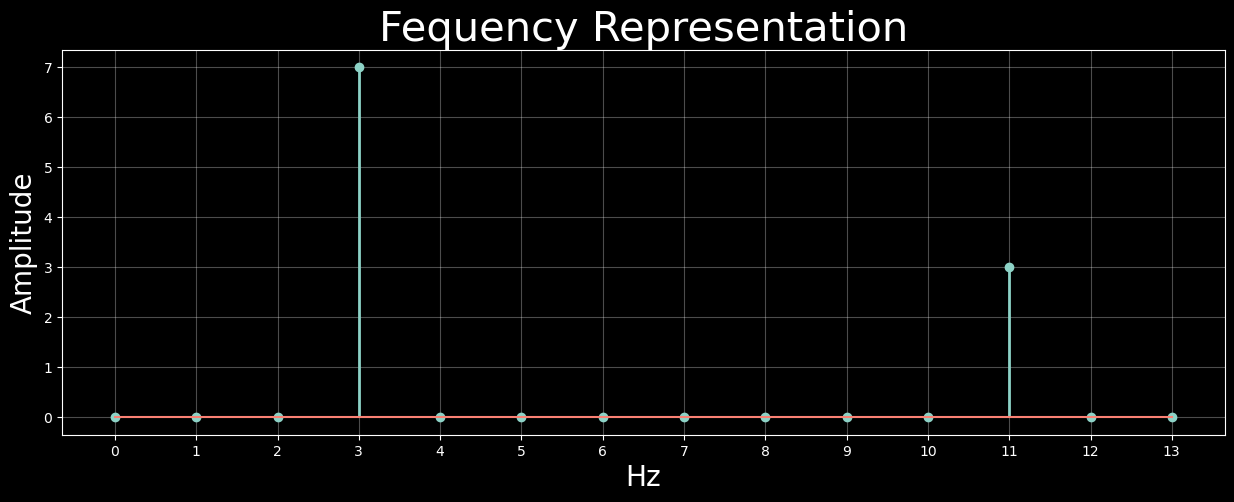

In [6]:
# Frequency domain representation

ft = np.fft.fft(Sum)/len(Sum)          

tpCount     = len(Sum)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/1000

frequencies = values/timePeriod
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
plt.title('Fequency Representation', fontsize=30)
plt.xlabel("Hz", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
markerline, stemlines, baseline=plt.stem(frequencies[0:14],2*abs(ft[0:14]), label="sound")
plt.setp(stemlines, 'linewidth', 2)
plt.savefig('fr_rep1.png')
plt.show()


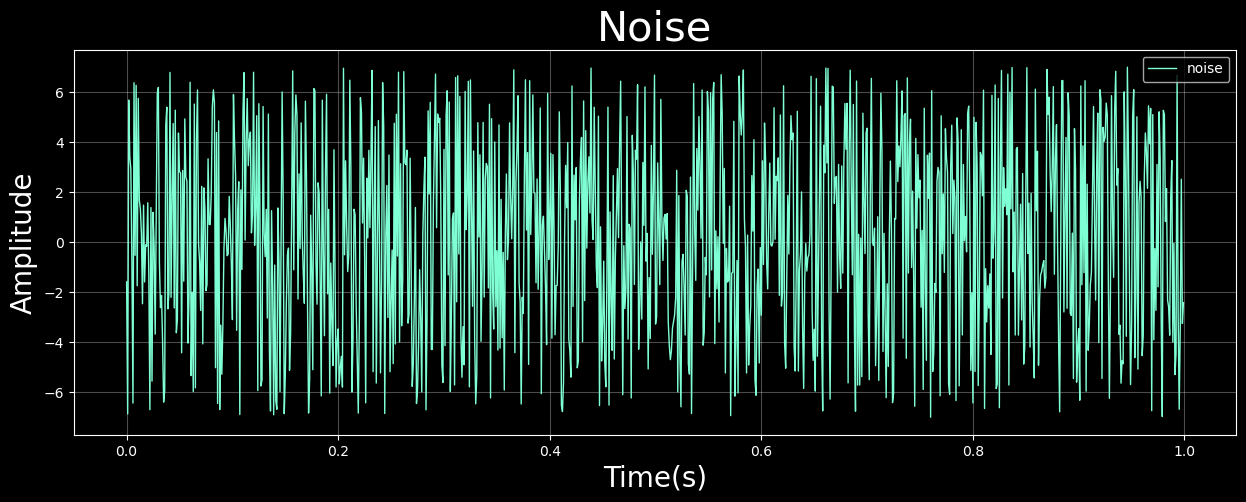

In [7]:
# Generate a random Noise
noise=14*np.random.sample(len(t))-7
draw(x_axis = t,y_axis =noise ,label="noise",color="aquamarine", x_label = "Time(s)",
     y_label = "Amplitude", title="Noise", lw=1)

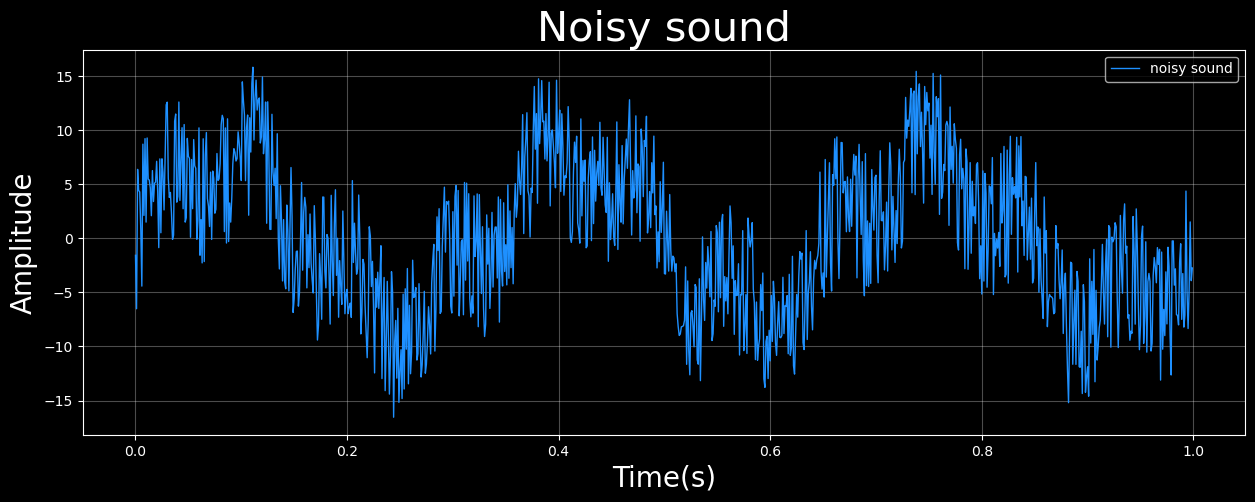

In [8]:
noisy=noise+Sum
draw(x_axis = t,y_axis =noisy ,label="noisy sound",color="dodgerblue", x_label = "Time(s)",y_label = "Amplitude",
     title="Noisy sound", lw=1)

<function matplotlib.pyplot.show(close=None, block=None)>

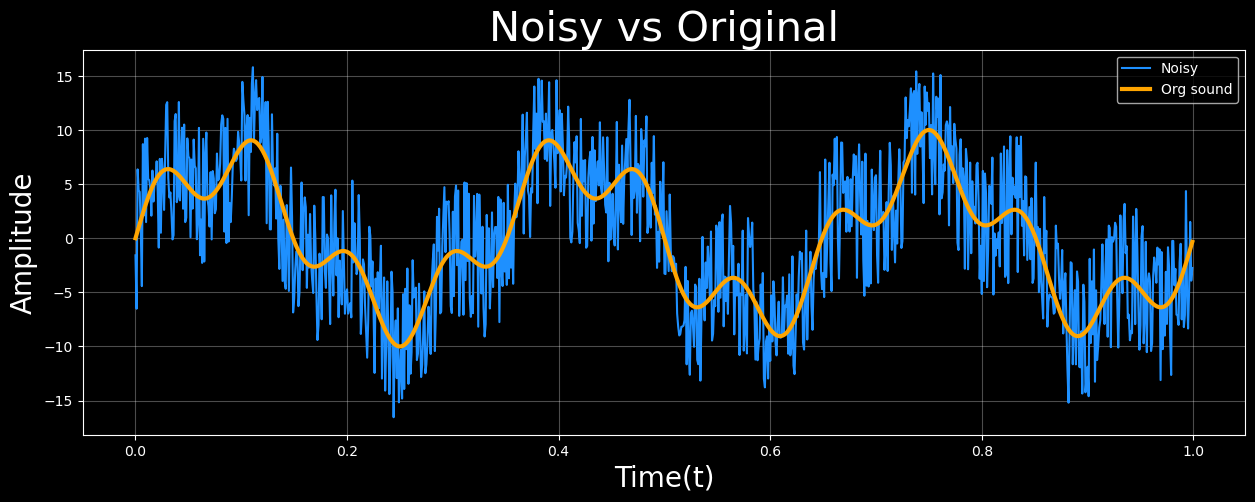

In [9]:
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
plt.style.use('dark_background')
plt.plot(t,noisy,label="Noisy", color="dodgerblue")
plt.plot( t, Sum ,label="Org sound",color="orange",linewidth=3)
plt.xlabel("Time(t)", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
plt.title("Noisy vs Original",fontsize = 30)
plt.legend(loc='upper right')
plt.show

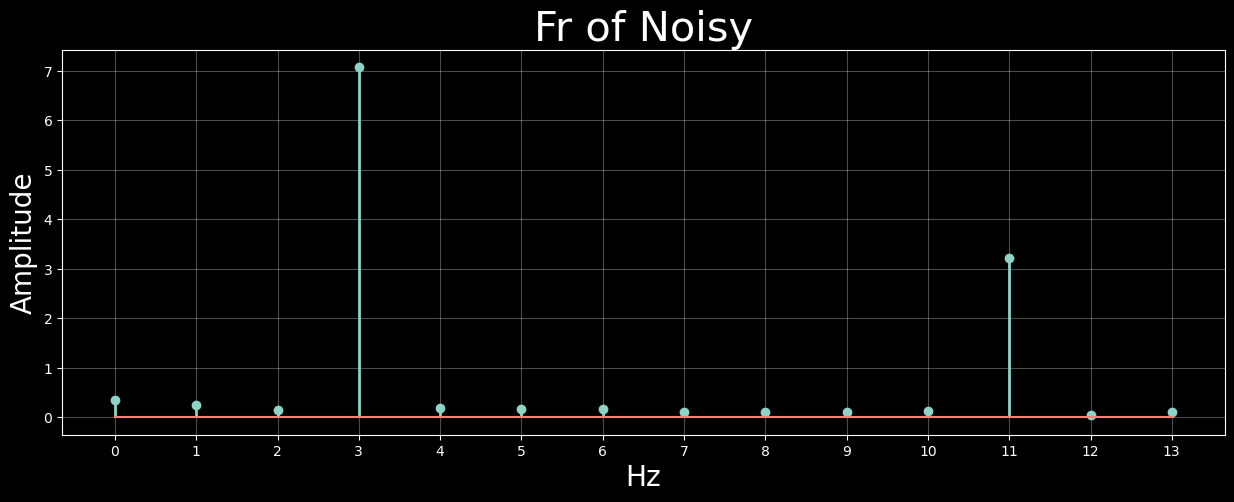

In [10]:
# Frequency domain representation
ft = np.fft.fft(noisy)/len(noisy)       
tpCount     = len(noisy)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/1000
frequencies = values/timePeriod
psd=2*abs(ft)
plt.figure(figsize = (15,5))
plt.title('Fr of Noisy', fontsize=30)
plt.xlabel("Hz", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
plt.grid(alpha = 0.3)
plt.xticks(np.arange(14))
plt.style.use('dark_background')
#plt.plot(frequencies[0:498],psd[0:498])
markerline, stemlines, baseline=plt.stem(frequencies[0:14],psd[0:14])
plt.setp(stemlines, 'linewidth', 2)
plt.show()

C:\Users\Trijal\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


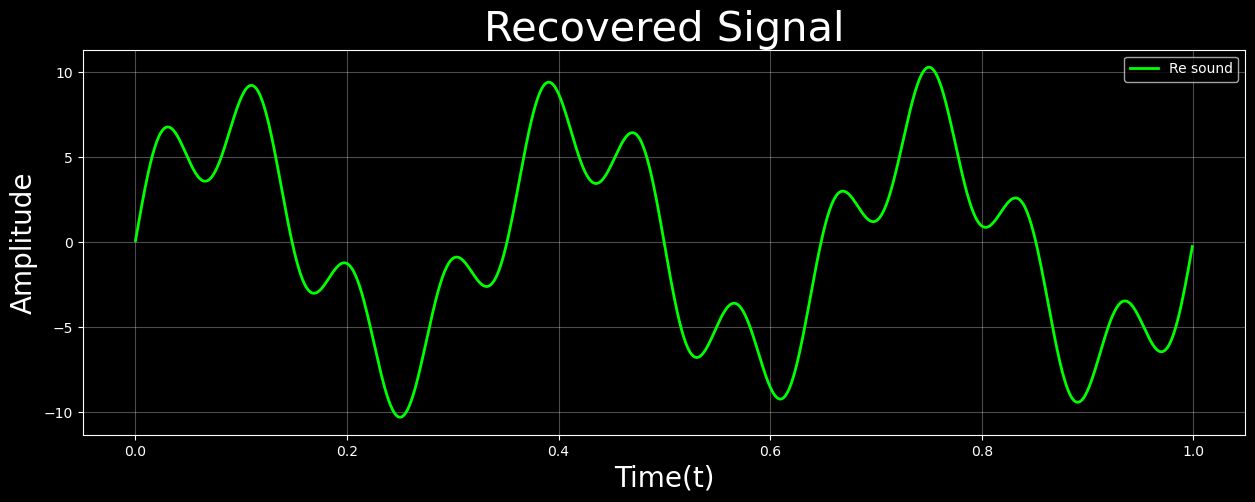

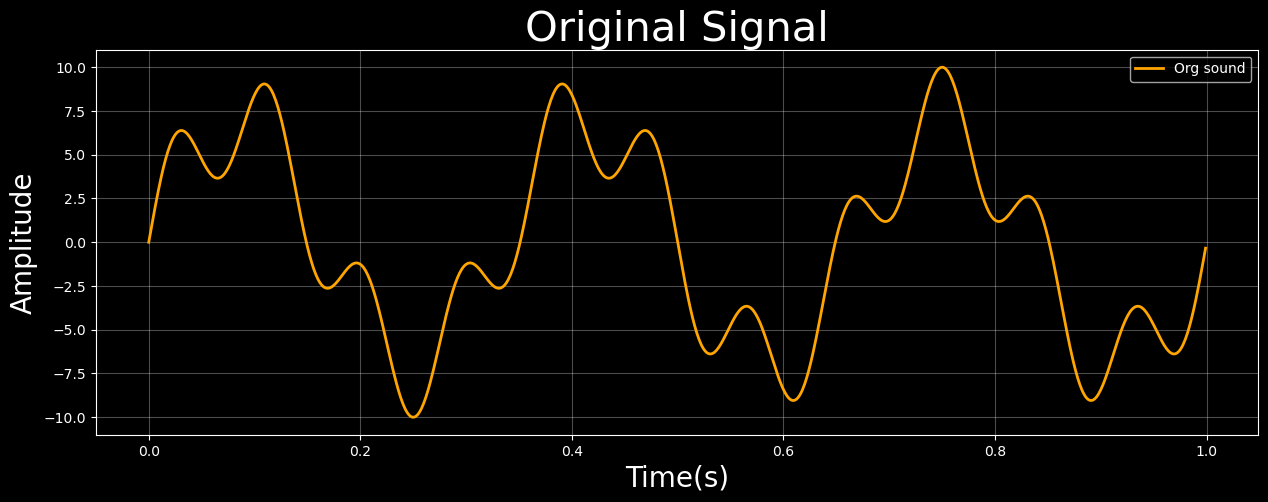

In [12]:
# selecting only prominent frequecies any nullifing all the other frequencies in the fourier transform

indices = [psd > 2]
filt_ft = ft*indices

# doing inverse fourier transformation of the filtered FT

inve_ft = np.fft.ifft(filt_ft)
draw(x_axis = t,y_axis = 1000*inve_ft.reshape((1000,)),label="Re sound", color="lime",x_label = "Time(t)",
     y_label = "Amplitude", title="Recovered Signal",lw=2)
draw(x_axis = t,y_axis =Sum ,label="Org sound",color="orange", x_label = "Time(s)",y_label = "Amplitude"
    ,title="Original Signal", lw=2)

C:\Users\Trijal\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

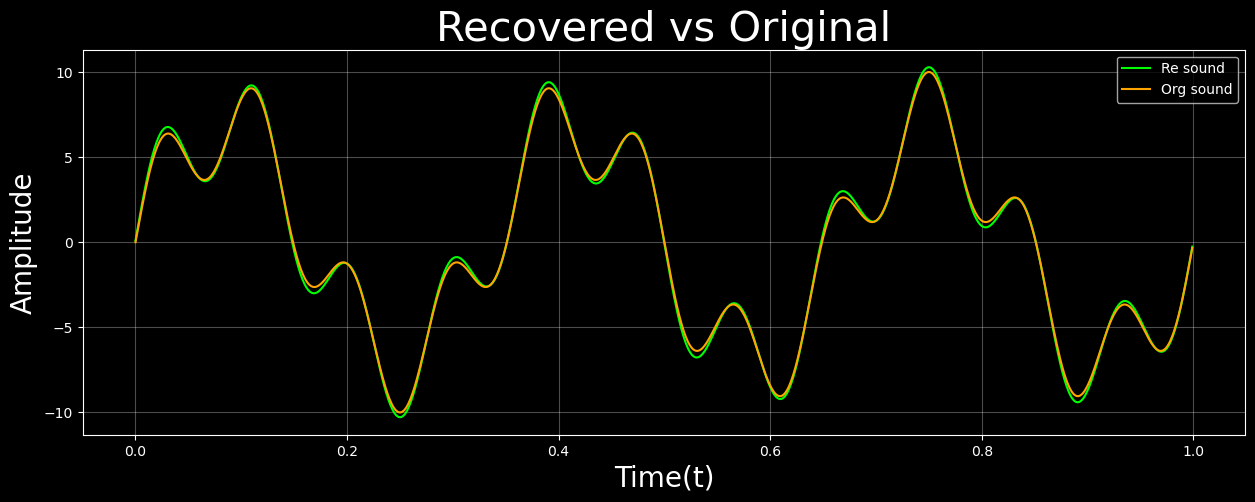

In [13]:
plt.figure(figsize = (15,5))
plt.grid(alpha = 0.3)
#plt.xticks(np.arange(13))
plt.style.use('dark_background')
plt.plot(t,1000*inve_ft.reshape((1000,)),label="Re sound", color="lime")
plt.plot( t, Sum ,label="Org sound",color="orange")
plt.xlabel("Time(t)", fontsize = 20)
plt.ylabel("Amplitude", fontsize= 20)
plt.title("Recovered vs Original",fontsize = 30)
plt.legend(loc='upper right')
plt.savefig('sound.png')
plt.show